# <u>Image Segmentation in OpenCV</u> <br><br>

## <i><u>Image Segmentation by Clustering</u></i><br>

### Installing dependancies:

In [15]:
pip install opencv-python scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


### Loading Sample Image:


### Image Segmentation by K-Means clustering: 

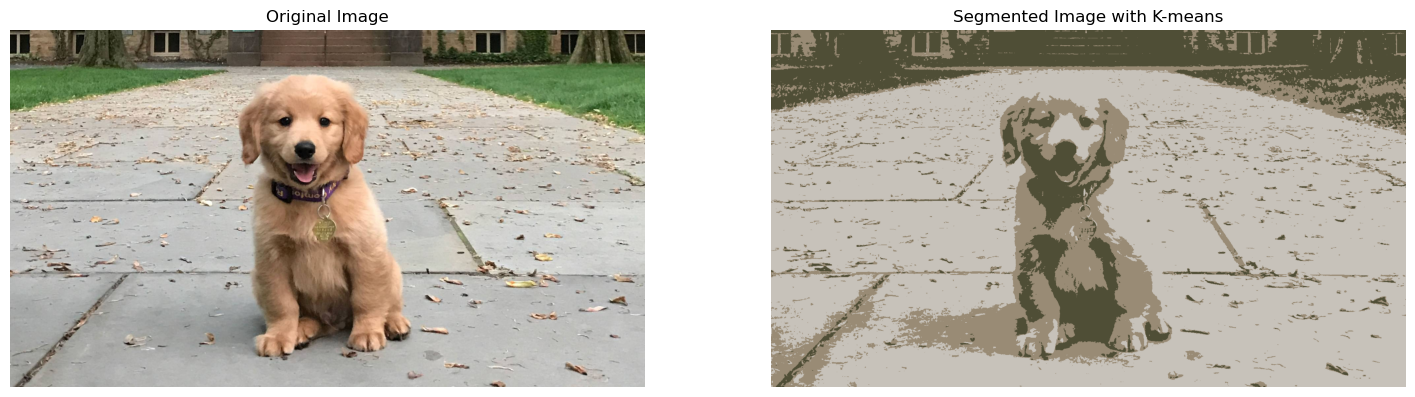

In [5]:
# Step 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Load Image
image = cv2.imread("C:\\Users\\Srujan VN\\Downloads\\dog.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

# Step 3: Preprocess Image
# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image_rgb.reshape(-1, 3)

# Step 4: Apply K-means Clustering
# Set the number of clusters (segments)
k = 3  # You can change the number of clusters

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Get the clustered pixel values
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image_rgb.shape).astype(np.uint8)

# Step 5: Visualize the Results
fig, ax = plt.subplots(1, 2, figsize=(18, 9))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmented_img)
ax[1].set_title('Segmented Image with K-means')
ax[1].axis('off')

plt.show()


## <br><br><i><u>Image Segementation through watershed algorithm in OpenCV</u></i><br>

### Installing Dependancies:

In [2]:
pip install opencv-python matplotlib   

Note: you may need to restart the kernel to use updated packages.


### Edge Detection using Canny Edge Detection:

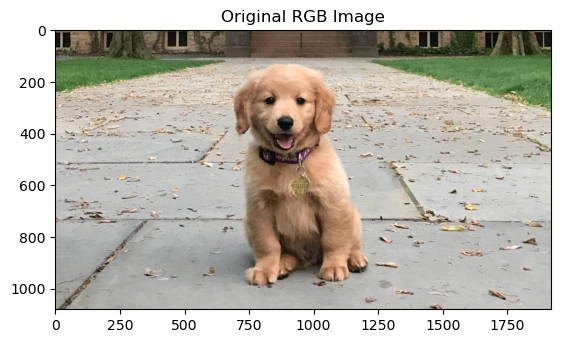

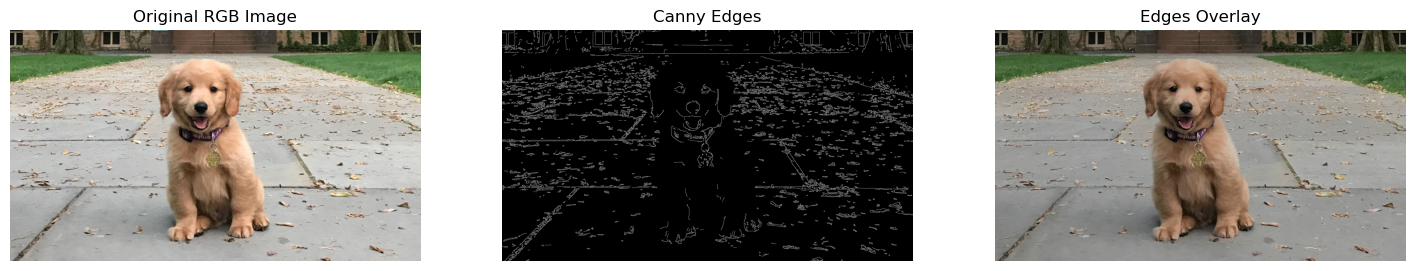

In [11]:
# Step 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load Image in RGB
image = cv2.imread("C:\\Users\\Srujan VN\\Downloads\\dog.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.show()

# Step 3: Convert RGB to Grayscale for Edge Detection
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Step 4: Apply Canny Edge Detection
edges = cv2.Canny(image_gray, threshold1=100, threshold2=200)

# Step 5: Overlay Edges on Original Image
edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
overlay = cv2.addWeighted(image_rgb, 0.8, edges_colored, 0.2, 0)

# Step 6: Visualize the Results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image_rgb)
ax[0].set_title('Original RGB Image')
ax[0].axis('off')

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny Edges')
ax[1].axis('off')

ax[2].imshow(overlay)
ax[2].set_title('Edges Overlay')
ax[2].axis('off')

plt.show()


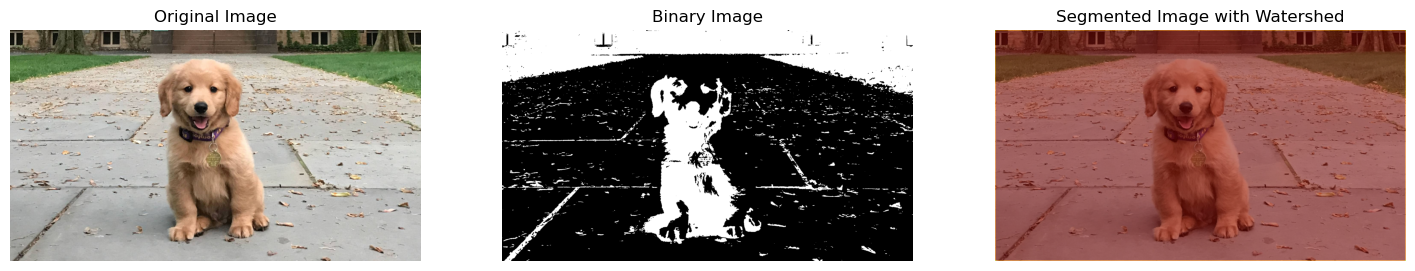

In [13]:
# Step 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load Image
image = cv2.imread("C:\\Users\\Srujan VN\\Downloads\\dog.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Step 3: Preprocess Image
# Apply threshold to get a binary image
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove small noise by morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 4: Apply Watershed Algorithm
# Labeling the markers
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 0] = 0

# Apply watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark boundaries with red color

# Step 5: Visualize Results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary, cmap='gray')
ax[1].set_title('Binary Image')
ax[1].axis('off')

ax[2].imshow(image_rgb)
ax[2].imshow(markers, cmap='jet', alpha=0.5)
ax[2].set_title('Segmented Image with Watershed')
ax[2].axis('off')

plt.show()
